In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 You have been handed three datasets (Product Information, Transaction Details, and Customer Demographics) for analysis.
 However, some of the data contains missing values, which could affect the accuracy of the insights. 
 Your task is to identify and handle the missing values in the dataset, ensuring that the data is clean and ready for analysis.
 Use appropriate techniques to fill in missing numerical values, such as prices or quantities.

In [2]:
df_c=pd.read_excel(r"C:\Users\Mir Abdul Malique\Downloads\Customer Behaviour Amazon\Customer_Demographics_Purchase_History_With_Missing_Numeric.xlsx")

In [3]:
df_c

,Customer_ID,Customer_Name,Age,Gender,Location,Product_Category,Product_ID,Purchase_Date,Purchase_Amount,Payment_Method,Rating,Feedback_Comments
0,17270,John,56.0,Other,New York,Books,674,2020-01-01 00:00:00,491.643012,Cash,NaN,NaN
1,10860,Eve,33.0,Other,Houston,Home Appliances,393,2020-01-01 01:00:00,144.326722,Cash,5.0,Good
2,15390,John,50.0,Female,Houston,Clothing,995,2020-01-01 02:00:00,109.301892,Bank Transfer,NaN,NaN
3,15191,Eve,66.0,Other,San Francisco,Electronics,405,2020-01-01 03:00:00,226.655516,Bank Transfer,2.0,Excellent
4,15734,Eve,38.0,Female,New York,Toys,353,2020-01-01 04:00:00,37.851880,Bank Transfer,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,10661,Charlie,61.0,Male,Los Angeles,Home Appliances,989,2020-03-24 03:00:00,168.291356,Credit Card,5.0,Excellent
1996,13374,Eve,41.0,Female,Chicago,Books,409,2020-03-24 04:00:00,237.252493,Bank Transfer,5.0,Average
1997,19208,Alice,58.0,Female,Houston,Toys,617,2020-03-24 05:00:00,213.388283,PayPal,4.0,Good
1998,10207,John,18.0,Female,San Francisco,Books,113,2020-03-24 06:00:00,83.056883,Bank Transfer,2.0,NaN


In [4]:
df_p=pd.read_csv(r"C:\Users\Mir Abdul Malique\Downloads\Customer Behaviour Amazon\Product_Information_With_Missing_Numeric.csv")

In [5]:
df_p

,Product_ID,Product_Name,Category,Price,Stock_Level,Supplier,Discount,Rating
0,202,Book,Home Appliances,838.665080,290,Supplier C,3,3
1,535,Book,Books,212.950114,332,Supplier A,21,2
2,960,Phone,Home Appliances,452.327541,179,Supplier B,21,2
3,370,Shirt,Toys,215.423366,414,Supplier A,36,5
4,206,Refrigerator,Electronics,279.182380,357,Supplier B,38,5
...,...,...,...,...,...,...,...,...
1995,667,Phone,Clothing,143.191788,57,Supplier C,25,3
1996,139,Shirt,Books,426.145366,62,Supplier A,19,2
1997,965,Phone,Toys,767.195632,155,Supplier B,41,4
1998,139,Phone,Clothing,902.305995,448,Supplier B,27,5


In [6]:
df_t=pd.read_json(r"C:\Users\Mir Abdul Malique\Downloads\Customer Behaviour Amazon\Transaction_Details_With_Missing_Numeric.json",lines=True)

In [7]:
df_t

,Transaction_ID,Customer_ID,Product_ID,Shipping_Date,Delivery_Status,Return_Status,Feedback_Rating,Return_Reason
0,115795,18859,751,1.609459e+12,Delivered,Returned,5,No Reason
1,100860,17818,198,1.609463e+12,Delivered,Returned,1,Wrong Item
2,176820,14728,377,1.609466e+12,Delivered,Returned,4,No Reason
3,154886,12624,662,1.609470e+12,Cancelled,Returned,4,
4,106265,15738,762,NaN,In Transit,Not Returned,1,
...,...,...,...,...,...,...,...,...
3995,122440,14541,280,1.623841e+12,Delivered,Returned,1,Damaged
3996,135205,13257,118,1.623845e+12,Cancelled,Not Returned,1,
3997,180811,16213,325,1.623848e+12,In Transit,Not Returned,4,Wrong Item
3998,155103,14869,572,1.623852e+12,In Transit,Not Returned,1,


In [8]:
df_c.columns

Index(['Customer_ID', 'Customer_Name', 'Age', 'Gender', 'Location',
       'Product_Category', 'Product_ID', 'Purchase_Date', 'Purchase_Amount',
       'Payment_Method', 'Rating', 'Feedback_Comments'],
      dtype='object')

In [9]:
df_t.columns

Index(['Transaction_ID', 'Customer_ID', 'Product_ID', 'Shipping_Date',
       'Delivery_Status', 'Return_Status', 'Feedback_Rating', 'Return_Reason'],
      dtype='object')

In [10]:
df_p.columns

Index(['Product_ID', 'Product_Name', 'Category', 'Price', 'Stock_Level',
       'Supplier', 'Discount', 'Rating'],
      dtype='object')

# Data Cleaning of Customer DataFrame 
 Checking Null values: (isnull()) ,
 Checking Duplicates value: (isduplicated()) ,
 Checking inconsistent data

In [11]:
df_c.isnull()

,Customer_ID,Customer_Name,Age,Gender,Location,Product_Category,Product_ID,Purchase_Date,Purchase_Amount,Payment_Method,Rating,Feedback_Comments
0,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False,True


In [12]:
df_c.isnull().sum()

Customer_ID            0
Customer_Name        100
Age                  100
Gender                 0
Location               0
Product_Category       0
Product_ID             0
Purchase_Date          0
Purchase_Amount      200
Payment_Method         0
Rating               140
Feedback_Comments    901
dtype: int64

In [13]:
df_c.describe()

,Customer_ID,Age,Product_ID,Purchase_Date,Purchase_Amount,Rating
count,2000.000000,1900.000000,2000.000000,2000,1800.000000,1860.000000
mean,15022.171500,43.696316,546.669000,2020-02-11 15:29:59.999999744,257.954370,2.978495
min,10001.000000,18.000000,100.000000,2020-01-01 00:00:00,10.077295,1.000000
25%,12585.750000,31.000000,320.750000,2020-01-21 19:45:00,134.525844,2.000000
50%,15104.500000,43.000000,551.000000,2020-02-11 15:30:00,257.545509,3.000000
75%,17408.250000,57.000000,763.000000,2020-03-03 11:15:00,383.819725,4.000000
max,19998.000000,69.000000,998.000000,2020-03-24 07:00:00,499.839871,5.000000
std,2865.577794,14.902947,259.999847,NaN,142.217621,1.409478


In [14]:
#IQR=(383.819725-134.525844) 
#lb=134.525844-1.5*IQR
#ub=383.819725+1.5*IQR
#print(IQR)
#print(lb)
#print(ub)

In [15]:
df_c['Customer_Name'].fillna("Unknown",inplace=True)
df_c['Age'].fillna(df_c['Age'].mean(),inplace=True)
df_c['Purchase_Amount'].fillna(df_c['Purchase_Amount'].mean(),inplace=True)
df_c['Rating'].fillna(df_c['Rating'].mode()[0],inplace=True)
df_c.drop('Feedback_Comments',axis=1,inplace=True)

In [16]:
df_c.isna().sum()

Customer_ID         0
Customer_Name       0
Age                 0
Gender              0
Location            0
Product_Category    0
Product_ID          0
Purchase_Date       0
Purchase_Amount     0
Payment_Method      0
Rating              0
dtype: int64

In [17]:
df_c.duplicated().sum()

0

In [18]:
#if in case there is duplicate present we can use df_c.drop_duplicates(inplace=True)

In [19]:
#checking if all the necessary columns have respective formats otherwise change it 
#for example df_c['Purchase_Date']=pd.to_datetime(df_c['Purchase_Date'])
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer_ID       2000 non-null   int64         
 1   Customer_Name     2000 non-null   object        
 2   Age               2000 non-null   float64       
 3   Gender            2000 non-null   object        
 4   Location          2000 non-null   object        
 5   Product_Category  2000 non-null   object        
 6   Product_ID        2000 non-null   int64         
 7   Purchase_Date     2000 non-null   datetime64[ns]
 8   Purchase_Amount   2000 non-null   float64       
 9   Payment_Method    2000 non-null   object        
 10  Rating            2000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 172.0+ KB


# Data Celaning For Product DataFrame

In [20]:
df_p.isnull().sum()

Product_ID        0
Product_Name    100
Category          0
Price           200
Stock_Level       0
Supplier          0
Discount          0
Rating            0
dtype: int64

In [21]:
df_p.describe()

,Product_ID,Price,Stock_Level,Discount,Rating
count,2000.000000,1800.000000,2000.000000,2000.000000,2000.000000
mean,548.302500,498.858379,237.706000,24.642000,3.002000
std,266.893188,285.120922,145.723355,14.501517,1.403916
min,100.000000,20.614966,-1.000000,0.000000,1.000000
25%,315.000000,252.041475,110.000000,12.000000,2.000000
50%,549.500000,496.512788,234.000000,24.000000,3.000000
75%,785.250000,742.232881,360.000000,37.000000,4.000000
max,998.000000,999.852260,499.000000,49.000000,5.000000


In [22]:
IQR=742.232881-252.041475
lb=252.041475-1.5*IQR
ub=742.23288+1.5*IQR
print(IQR)
print(lb)
print(ub)

490.19140600000003
-483.2456340000001
1477.5199890000001


In [23]:
df_p['Product_Name'].fillna('Unknown',inplace=True)
df_p['Price'].fillna(df_p['Price'].mean(),inplace=True)

In [24]:
df_p.isnull().sum()

Product_ID      0
Product_Name    0
Category        0
Price           0
Stock_Level     0
Supplier        0
Discount        0
Rating          0
dtype: int64

In [25]:
df_p.duplicated().sum()

0

In [26]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_ID    2000 non-null   int64  
 1   Product_Name  2000 non-null   object 
 2   Category      2000 non-null   object 
 3   Price         2000 non-null   float64
 4   Stock_Level   2000 non-null   int64  
 5   Supplier      2000 non-null   object 
 6   Discount      2000 non-null   int64  
 7   Rating        2000 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 125.1+ KB


# Data Celaning For Transaction DataFrame

In [27]:
df_t.shape

(4000, 8)

In [28]:
df_t.isnull().sum()

Transaction_ID       0
Customer_ID          0
Product_ID           0
Shipping_Date      200
Delivery_Status    280
Return_Status        0
Feedback_Rating      0
Return_Reason        0
dtype: int64

In [29]:
df_t.describe()

,Transaction_ID,Customer_ID,Product_ID,Shipping_Date,Feedback_Rating
count,4000.000000,4000.000000,4000.000000,3.800000e+03,4000.000000
mean,149332.371500,14933.221000,556.226500,1.616654e+12,2.832250
std,28903.525149,2865.062739,261.650081,4.158782e+09,1.550068
min,100055.000000,10001.000000,100.000000,1.609459e+12,-1.000000
25%,124054.750000,12510.500000,328.000000,1.613048e+12,2.000000
50%,149249.000000,14845.500000,558.500000,1.616661e+12,3.000000
75%,174534.750000,17381.250000,787.000000,1.620242e+12,4.000000
max,199986.000000,19993.000000,998.000000,1.623856e+12,5.000000


In [30]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   4000 non-null   int64  
 1   Customer_ID      4000 non-null   int64  
 2   Product_ID       4000 non-null   int64  
 3   Shipping_Date    3800 non-null   float64
 4   Delivery_Status  3720 non-null   object 
 5   Return_Status    4000 non-null   object 
 6   Feedback_Rating  4000 non-null   int64  
 7   Return_Reason    4000 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 250.1+ KB


In [31]:
df_t['Shipping_Date'] = pd.to_datetime(df_t['Shipping_Date'])

In [32]:
df_t['Shipping_Date_only']=df_t['Shipping_Date'].dt.date

In [33]:
df_t.columns

Index(['Transaction_ID', 'Customer_ID', 'Product_ID', 'Shipping_Date',
       'Delivery_Status', 'Return_Status', 'Feedback_Rating', 'Return_Reason',
       'Shipping_Date_only'],
      dtype='object')

In [34]:
df_t.isnull().sum()

Transaction_ID          0
Customer_ID             0
Product_ID              0
Shipping_Date         200
Delivery_Status       280
Return_Status           0
Feedback_Rating         0
Return_Reason           0
Shipping_Date_only    200
dtype: int64

In [35]:
missing_ship_date=df_t['Shipping_Date'].median()
df_t['Delivery_Status'].fillna(df_t['Delivery_Status'].mode()[0],inplace =True)
df_t['Shipping_Date'].fillna(missing_ship_date,inplace=True)
df_t['Shipping_Date_only'].fillna(missing_ship_date,inplace=True)

In [36]:
df_t.isnull().sum()

Transaction_ID        0
Customer_ID           0
Product_ID            0
Shipping_Date         0
Delivery_Status       0
Return_Status         0
Feedback_Rating       0
Return_Reason         0
Shipping_Date_only    0
dtype: int64

In [37]:
merged_df = pd.merge(df_p, df_t, on='Product_ID', how='left')
merged_df = pd.merge(merged_df, df_c, on='Product_ID', how='left',suffixes=('_transaction', '_customer'))

In [38]:
merged_df.head()

,Product_ID,Product_Name,Category,Price,Stock_Level,Supplier,Discount,Rating_transaction,Transaction_ID,Customer_ID_transaction,...,Customer_ID_customer,Customer_Name,Age,Gender,Location,Product_Category,Purchase_Date,Purchase_Amount,Payment_Method,Rating_customer
0,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,14776.0,...,12752.0,Bob,38.0,Male,San Francisco,Toys,2020-03-02 23:00:00,134.311447,Bank Transfer,3.0
1,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,14776.0,...,12043.0,Bob,37.0,Male,Chicago,Books,2020-03-06 22:00:00,475.639185,Bank Transfer,4.0
2,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,14776.0,...,14904.0,Bob,66.0,Female,Los Angeles,Home Appliances,2020-03-09 07:00:00,257.954370,Bank Transfer,3.0
3,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,14776.0,...,12989.0,Unknown,45.0,Female,New York,Clothing,2020-03-18 04:00:00,12.022306,Cash,4.0
4,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,135195.0,19369.0,...,12752.0,Bob,38.0,Male,San Francisco,Toys,2020-03-02 23:00:00,134.311447,Bank Transfer,3.0


In [39]:
merged_df.isnull().sum()

Product_ID                    0
Product_Name                  0
Category                      0
Price                         0
Stock_Level                   0
Supplier                      0
Discount                      0
Rating_transaction            0
Transaction_ID               48
Customer_ID_transaction      48
Shipping_Date                48
Delivery_Status              48
Return_Status                48
Feedback_Rating              48
Return_Reason                48
Shipping_Date_only           48
Customer_ID_customer       1052
Customer_Name              1052
Age                        1052
Gender                     1052
Location                   1052
Product_Category           1052
Purchase_Date              1052
Purchase_Amount            1052
Payment_Method             1052
Rating_customer            1052
dtype: int64

In [40]:
# Remove duplicated Customer_ID columns by keeping the one from customer data
merged_df['Customer_ID'] = merged_df['Customer_ID_customer'].fillna(merged_df['Customer_ID_transaction'])

In [41]:
# Drop the extra Customer_ID columns and any other redundant columns
merged_df.drop(['Customer_ID_transaction', 'Customer_ID_customer'], axis=1, inplace=True)
# Rename columns to be more descriptive and consistent
merged_df.rename(columns={
    'Product_Name': 'Product Name',
    'Purchase_Amount': 'Purchase Amount',
    'Purchase_Date': 'Purchase Date',
    'Rating_x': 'Product Rating',
    'Rating_y': 'Customer Rating'
}, inplace=True)

In [42]:
#drop duplicated
merged_df.drop_duplicates(subset=['Product_ID', 'Customer_ID','Transaction_ID'], inplace=True)

In [43]:
merged_df.head(10)

,Product_ID,Product Name,Category,Price,Stock_Level,Supplier,Discount,Rating_transaction,Transaction_ID,Shipping_Date,...,Customer_Name,Age,Gender,Location,Product_Category,Purchase Date,Purchase Amount,Payment_Method,Rating_customer,Customer_ID
0,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Bob,38.0,Male,San Francisco,Toys,2020-03-02 23:00:00,134.311447,Bank Transfer,3.0,12752.0
1,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Bob,37.0,Male,Chicago,Books,2020-03-06 22:00:00,475.639185,Bank Transfer,4.0,12043.0
2,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Bob,66.0,Female,Los Angeles,Home Appliances,2020-03-09 07:00:00,257.954370,Bank Transfer,3.0,14904.0
3,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Unknown,45.0,Female,New York,Clothing,2020-03-18 04:00:00,12.022306,Cash,4.0,12989.0
4,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,Bob,38.0,Male,San Francisco,Toys,2020-03-02 23:00:00,134.311447,Bank Transfer,3.0,12752.0
5,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,Bob,37.0,Male,Chicago,Books,2020-03-06 22:00:00,475.639185,Bank Transfer,4.0,12043.0
6,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,Bob,66.0,Female,Los Angeles,Home Appliances,2020-03-09 07:00:00,257.954370,Bank Transfer,3.0,14904.0
7,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,Unknown,45.0,Female,New York,Clothing,2020-03-18 04:00:00,12.022306,Cash,4.0,12989.0
8,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,195084.0,1970-01-01 00:26:52.278000,...,Bob,38.0,Male,San Francisco,Toys,2020-03-02 23:00:00,134.311447,Bank Transfer,3.0,12752.0
9,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,195084.0,1970-01-01 00:26:52.278000,...,Bob,37.0,Male,Chicago,Books,2020-03-06 22:00:00,475.639185,Bank Transfer,4.0,12043.0


In [44]:
merged_df.duplicated(subset=['Product_ID', 'Customer_ID','Transaction_ID']).sum()

0

In [45]:
duplicate_rows=merged_df[merged_df.duplicated(subset=['Product_ID','Transaction_ID'],keep=False)]
duplicate_rows

,Product_ID,Product Name,Category,Price,Stock_Level,Supplier,Discount,Rating_transaction,Transaction_ID,Shipping_Date,...,Customer_Name,Age,Gender,Location,Product_Category,Purchase Date,Purchase Amount,Payment_Method,Rating_customer,Customer_ID
0,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Bob,38.0,Male,San Francisco,Toys,2020-03-02 23:00:00,134.311447,Bank Transfer,3.0,12752.0
1,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Bob,37.0,Male,Chicago,Books,2020-03-06 22:00:00,475.639185,Bank Transfer,4.0,12043.0
2,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Bob,66.0,Female,Los Angeles,Home Appliances,2020-03-09 07:00:00,257.954370,Bank Transfer,3.0,14904.0
3,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Unknown,45.0,Female,New York,Clothing,2020-03-18 04:00:00,12.022306,Cash,4.0,12989.0
4,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,Bob,38.0,Male,San Francisco,Toys,2020-03-02 23:00:00,134.311447,Bank Transfer,3.0,12752.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20622,667,Phone,Clothing,143.191788,57,Supplier C,25,3,131367.0,1970-01-01 00:26:58.128000,...,Eve,20.0,Other,Houston,Books,2020-03-20 02:00:00,199.706143,PayPal,4.0,18105.0
20623,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,Charlie,55.0,Male,Los Angeles,Home Appliances,2020-01-26 05:00:00,149.786219,Bank Transfer,2.0,13627.0
20624,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,Alice,56.0,Other,Houston,Electronics,2020-01-27 05:00:00,491.201865,Bank Transfer,3.0,10667.0
20625,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,Bob,32.0,Male,Houston,Home Appliances,2020-01-31 04:00:00,384.187046,Cash,2.0,17002.0


In [46]:
aggregated_df = merged_df.groupby(['Product_ID', 'Transaction_ID']).agg({
    'Purchase Amount': 'sum',  # Summing up the purchase amount for the same Product_ID and Transaction_ID
    'Rating_customer': 'mean',          # Averaging ratings if applicable
    'Customer_ID': 'first',# Keeping the first customer ID or using another logic
    'Customer_Name': 'first'
}).reset_index()

aggregated_df

,Product_ID,Transaction_ID,Purchase Amount,Rating_customer,Customer_ID,Customer_Name
0,100,140600.0,661.482284,3.5,13778.0,Bob
1,100,152893.0,661.482284,3.5,13778.0,Bob
2,100,172805.0,661.482284,3.5,13778.0,Bob
3,100,195998.0,661.482284,3.5,13778.0,Bob
4,101,106406.0,191.821720,5.0,16783.0,Charlie
...,...,...,...,...,...,...
3501,998,135222.0,1232.592483,3.4,10004.0,Unknown
3502,998,149812.0,1232.592483,3.4,10004.0,Unknown
3503,998,164106.0,1232.592483,3.4,10004.0,Unknown
3504,998,165481.0,1232.592483,3.4,10004.0,Unknown


# Feature Engineering
  **total purchase amount for each customer**
  
  **frequency of  product return**
  
  **Average feedback rating**
  
  **time difference between the last and the latest purchase**
  
  
  

In [47]:
merged_df.columns

Index(['Product_ID', 'Product Name', 'Category', 'Price', 'Stock_Level',
       'Supplier', 'Discount', 'Rating_transaction', 'Transaction_ID',
       'Shipping_Date', 'Delivery_Status', 'Return_Status', 'Feedback_Rating',
       'Return_Reason', 'Shipping_Date_only', 'Customer_Name', 'Age', 'Gender',
       'Location', 'Product_Category', 'Purchase Date', 'Purchase Amount',
       'Payment_Method', 'Rating_customer', 'Customer_ID'],
      dtype='object')

In [48]:
# total Purchase amount for each customer
merged_df['Total_purchase_amt']=merged_df.groupby('Customer_ID')['Purchase Amount'].transform('sum')
merged_df['Total_purchase_amt']

0         671.557233
1        2378.195923
2        1289.771850
3          60.111529
4         671.557233
            ...     
20622    1198.236859
20623    1930.534791
20624    2947.211191
20625    2305.122276
20626    1198.236859
Name: Total_purchase_amt, Length: 8161, dtype: float64

In [49]:
merged_df['Return_Status']

0            Returned
1            Returned
2            Returned
3            Returned
4        Not Returned
             ...     
20622    Not Returned
20623    Not Returned
20624    Not Returned
20625    Not Returned
20626    Not Returned
Name: Return_Status, Length: 8161, dtype: object

In [50]:
#frequency of return( we use sum instead of count because count only count not null values)
merged_df['Return_count']=merged_df.groupby('Customer_ID')['Return_Status'].transform(lambda i:(i=='Returned').sum())
merged_df.head(10)

,Product_ID,Product Name,Category,Price,Stock_Level,Supplier,Discount,Rating_transaction,Transaction_ID,Shipping_Date,...,Gender,Location,Product_Category,Purchase Date,Purchase Amount,Payment_Method,Rating_customer,Customer_ID,Total_purchase_amt,Return_count
0,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Male,San Francisco,Toys,2020-03-02 23:00:00,134.311447,Bank Transfer,3.0,12752.0,671.557233,3.0
1,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Male,Chicago,Books,2020-03-06 22:00:00,475.639185,Bank Transfer,4.0,12043.0,2378.195923,3.0
2,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Female,Los Angeles,Home Appliances,2020-03-09 07:00:00,257.954370,Bank Transfer,3.0,14904.0,1289.771850,3.0
3,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Female,New York,Clothing,2020-03-18 04:00:00,12.022306,Cash,4.0,12989.0,60.111529,3.0
4,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,Male,San Francisco,Toys,2020-03-02 23:00:00,134.311447,Bank Transfer,3.0,12752.0,671.557233,3.0
5,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,Male,Chicago,Books,2020-03-06 22:00:00,475.639185,Bank Transfer,4.0,12043.0,2378.195923,3.0
6,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,Female,Los Angeles,Home Appliances,2020-03-09 07:00:00,257.954370,Bank Transfer,3.0,14904.0,1289.771850,3.0
7,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,Female,New York,Clothing,2020-03-18 04:00:00,12.022306,Cash,4.0,12989.0,60.111529,3.0
8,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,195084.0,1970-01-01 00:26:52.278000,...,Male,San Francisco,Toys,2020-03-02 23:00:00,134.311447,Bank Transfer,3.0,12752.0,671.557233,3.0
9,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,195084.0,1970-01-01 00:26:52.278000,...,Male,Chicago,Books,2020-03-06 22:00:00,475.639185,Bank Transfer,4.0,12043.0,2378.195923,3.0


In [51]:
#Average feedback rating
merged_df['Avg_feedback_rating']=merged_df.groupby('Customer_ID')['Feedback_Rating'].transform('mean')
merged_df.head(20)


,Product_ID,Product Name,Category,Price,Stock_Level,Supplier,Discount,Rating_transaction,Transaction_ID,Shipping_Date,...,Location,Product_Category,Purchase Date,Purchase Amount,Payment_Method,Rating_customer,Customer_ID,Total_purchase_amt,Return_count,Avg_feedback_rating
0,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,San Francisco,Toys,2020-03-02 23:00:00,134.311447,Bank Transfer,3.0,12752.0,671.557233,3.0,3.0
1,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Chicago,Books,2020-03-06 22:00:00,475.639185,Bank Transfer,4.0,12043.0,2378.195923,3.0,3.0
2,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Los Angeles,Home Appliances,2020-03-09 07:00:00,257.954370,Bank Transfer,3.0,14904.0,1289.771850,3.0,3.0
3,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,New York,Clothing,2020-03-18 04:00:00,12.022306,Cash,4.0,12989.0,60.111529,3.0,3.0
4,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,San Francisco,Toys,2020-03-02 23:00:00,134.311447,Bank Transfer,3.0,12752.0,671.557233,3.0,3.0
5,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,Chicago,Books,2020-03-06 22:00:00,475.639185,Bank Transfer,4.0,12043.0,2378.195923,3.0,3.0
6,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,Los Angeles,Home Appliances,2020-03-09 07:00:00,257.954370,Bank Transfer,3.0,14904.0,1289.771850,3.0,3.0
7,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,New York,Clothing,2020-03-18 04:00:00,12.022306,Cash,4.0,12989.0,60.111529,3.0,3.0
8,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,195084.0,1970-01-01 00:26:52.278000,...,San Francisco,Toys,2020-03-02 23:00:00,134.311447,Bank Transfer,3.0,12752.0,671.557233,3.0,3.0
9,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,195084.0,1970-01-01 00:26:52.278000,...,Chicago,Books,2020-03-06 22:00:00,475.639185,Bank Transfer,4.0,12043.0,2378.195923,3.0,3.0


In [52]:
#time difference between the last purchase and the current date
merged_df['Days_since_last_purchase']=(pd.Timestamp.now()-merged_df.groupby('Customer_ID')['Purchase Date'].transform('max')).dt.days
merged_df.head(10)

,Product_ID,Product Name,Category,Price,Stock_Level,Supplier,Discount,Rating_transaction,Transaction_ID,Shipping_Date,...,Product_Category,Purchase Date,Purchase Amount,Payment_Method,Rating_customer,Customer_ID,Total_purchase_amt,Return_count,Avg_feedback_rating,Days_since_last_purchase
0,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Toys,2020-03-02 23:00:00,134.311447,Bank Transfer,3.0,12752.0,671.557233,3.0,3.0,1699.0
1,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Books,2020-03-06 22:00:00,475.639185,Bank Transfer,4.0,12043.0,2378.195923,3.0,3.0,1695.0
2,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Home Appliances,2020-03-09 07:00:00,257.954370,Bank Transfer,3.0,14904.0,1289.771850,3.0,3.0,1693.0
3,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Clothing,2020-03-18 04:00:00,12.022306,Cash,4.0,12989.0,60.111529,3.0,3.0,1684.0
4,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,Toys,2020-03-02 23:00:00,134.311447,Bank Transfer,3.0,12752.0,671.557233,3.0,3.0,1699.0
5,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,Books,2020-03-06 22:00:00,475.639185,Bank Transfer,4.0,12043.0,2378.195923,3.0,3.0,1695.0
6,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,Home Appliances,2020-03-09 07:00:00,257.954370,Bank Transfer,3.0,14904.0,1289.771850,3.0,3.0,1693.0
7,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,Clothing,2020-03-18 04:00:00,12.022306,Cash,4.0,12989.0,60.111529,3.0,3.0,1684.0
8,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,195084.0,1970-01-01 00:26:52.278000,...,Toys,2020-03-02 23:00:00,134.311447,Bank Transfer,3.0,12752.0,671.557233,3.0,3.0,1699.0
9,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,195084.0,1970-01-01 00:26:52.278000,...,Books,2020-03-06 22:00:00,475.639185,Bank Transfer,4.0,12043.0,2378.195923,3.0,3.0,1695.0


In [53]:
pd.Timestamp.now()

Timestamp('2024-10-27 11:24:38.711202')

In [54]:
merged_df.head(20)


,Product_ID,Product Name,Category,Price,Stock_Level,Supplier,Discount,Rating_transaction,Transaction_ID,Shipping_Date,...,Product_Category,Purchase Date,Purchase Amount,Payment_Method,Rating_customer,Customer_ID,Total_purchase_amt,Return_count,Avg_feedback_rating,Days_since_last_purchase
0,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Toys,2020-03-02 23:00:00,134.311447,Bank Transfer,3.0,12752.0,671.557233,3.0,3.0,1699.0
1,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Books,2020-03-06 22:00:00,475.639185,Bank Transfer,4.0,12043.0,2378.195923,3.0,3.0,1695.0
2,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Home Appliances,2020-03-09 07:00:00,257.954370,Bank Transfer,3.0,14904.0,1289.771850,3.0,3.0,1693.0
3,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Clothing,2020-03-18 04:00:00,12.022306,Cash,4.0,12989.0,60.111529,3.0,3.0,1684.0
4,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,Toys,2020-03-02 23:00:00,134.311447,Bank Transfer,3.0,12752.0,671.557233,3.0,3.0,1699.0
5,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,Books,2020-03-06 22:00:00,475.639185,Bank Transfer,4.0,12043.0,2378.195923,3.0,3.0,1695.0
6,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,Home Appliances,2020-03-09 07:00:00,257.954370,Bank Transfer,3.0,14904.0,1289.771850,3.0,3.0,1693.0
7,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,Clothing,2020-03-18 04:00:00,12.022306,Cash,4.0,12989.0,60.111529,3.0,3.0,1684.0
8,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,195084.0,1970-01-01 00:26:52.278000,...,Toys,2020-03-02 23:00:00,134.311447,Bank Transfer,3.0,12752.0,671.557233,3.0,3.0,1699.0
9,202,Book,Home Appliances,838.66508,290,Supplier C,3,3,195084.0,1970-01-01 00:26:52.278000,...,Books,2020-03-06 22:00:00,475.639185,Bank Transfer,4.0,12043.0,2378.195923,3.0,3.0,1695.0


In [55]:
# to get a last date from particular date
# merged_df['ab']=(pd.Timestamp("2024-05-12")-merged_df.groupby('Customer_ID')['Purchase Date'].transform('max'))
# merged_df.head(10)
#merged_df.drop('ab',axis=1)

In [56]:
merged_df['Customer_Lifetime_Value'] = merged_df.groupby('Customer_ID')['Purchase Amount'].transform('sum')
merged_df

,Product_ID,Product Name,Category,Price,Stock_Level,Supplier,Discount,Rating_transaction,Transaction_ID,Shipping_Date,...,Purchase Date,Purchase Amount,Payment_Method,Rating_customer,Customer_ID,Total_purchase_amt,Return_count,Avg_feedback_rating,Days_since_last_purchase,Customer_Lifetime_Value
0,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,2020-03-02 23:00:00,134.311447,Bank Transfer,3.0,12752.0,671.557233,3.0,3.0,1699.0,671.557233
1,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,2020-03-06 22:00:00,475.639185,Bank Transfer,4.0,12043.0,2378.195923,3.0,3.0,1695.0,2378.195923
2,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,2020-03-09 07:00:00,257.954370,Bank Transfer,3.0,14904.0,1289.771850,3.0,3.0,1693.0,1289.771850
3,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,2020-03-18 04:00:00,12.022306,Cash,4.0,12989.0,60.111529,3.0,3.0,1684.0,60.111529
4,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,2020-03-02 23:00:00,134.311447,Bank Transfer,3.0,12752.0,671.557233,3.0,3.0,1699.0,671.557233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20622,667,Phone,Clothing,143.191788,57,Supplier C,25,3,131367.0,1970-01-01 00:26:58.128000,...,2020-03-20 02:00:00,199.706143,PayPal,4.0,18105.0,1198.236859,0.0,2.5,1682.0,1198.236859
20623,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,2020-01-26 05:00:00,149.786219,Bank Transfer,2.0,13627.0,1930.534791,2.0,2.9,1736.0,1930.534791
20624,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,2020-01-27 05:00:00,491.201865,Bank Transfer,3.0,10667.0,2947.211191,0.0,2.5,1735.0,2947.211191
20625,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,2020-01-31 04:00:00,384.187046,Cash,2.0,17002.0,2305.122276,0.0,2.5,1731.0,2305.122276


In [57]:
merged_df.columns

Index(['Product_ID', 'Product Name', 'Category', 'Price', 'Stock_Level',
       'Supplier', 'Discount', 'Rating_transaction', 'Transaction_ID',
       'Shipping_Date', 'Delivery_Status', 'Return_Status', 'Feedback_Rating',
       'Return_Reason', 'Shipping_Date_only', 'Customer_Name', 'Age', 'Gender',
       'Location', 'Product_Category', 'Purchase Date', 'Purchase Amount',
       'Payment_Method', 'Rating_customer', 'Customer_ID',
       'Total_purchase_amt', 'Return_count', 'Avg_feedback_rating',
       'Days_since_last_purchase', 'Customer_Lifetime_Value'],
      dtype='object')

In [58]:
# To identify customers at risk of churn
#  Define a churn threshold, for example, 1713 days since it is historical data
# churn_threshold = merged_df['Days_since_last_purchase'].mean()

#  Identify customers whose last purchase was more than 1713 days ago
# at_risk_customers = merged_df[merged_df['Days_since_last_purchase'] > churn_threshold]['Customer_ID'].unique()

#  View the customers at risk
# print(at_risk_customers)

In [59]:
merged_df['Churn_Risk'] = merged_df['Days_since_last_purchase'].apply(lambda x: 1 if x >merged_df['Days_since_last_purchase'].mean()  else 0)
merged_df

,Product_ID,Product Name,Category,Price,Stock_Level,Supplier,Discount,Rating_transaction,Transaction_ID,Shipping_Date,...,Purchase Amount,Payment_Method,Rating_customer,Customer_ID,Total_purchase_amt,Return_count,Avg_feedback_rating,Days_since_last_purchase,Customer_Lifetime_Value,Churn_Risk
0,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,134.311447,Bank Transfer,3.0,12752.0,671.557233,3.0,3.0,1699.0,671.557233,0
1,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,475.639185,Bank Transfer,4.0,12043.0,2378.195923,3.0,3.0,1695.0,2378.195923,0
2,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,257.954370,Bank Transfer,3.0,14904.0,1289.771850,3.0,3.0,1693.0,1289.771850,0
3,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,12.022306,Cash,4.0,12989.0,60.111529,3.0,3.0,1684.0,60.111529,0
4,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,134.311447,Bank Transfer,3.0,12752.0,671.557233,3.0,3.0,1699.0,671.557233,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20622,667,Phone,Clothing,143.191788,57,Supplier C,25,3,131367.0,1970-01-01 00:26:58.128000,...,199.706143,PayPal,4.0,18105.0,1198.236859,0.0,2.5,1682.0,1198.236859,0
20623,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,149.786219,Bank Transfer,2.0,13627.0,1930.534791,2.0,2.9,1736.0,1930.534791,1
20624,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,491.201865,Bank Transfer,3.0,10667.0,2947.211191,0.0,2.5,1735.0,2947.211191,1
20625,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,384.187046,Cash,2.0,17002.0,2305.122276,0.0,2.5,1731.0,2305.122276,1


In [60]:
merged_df['Loyalty_Status'] = (merged_df.groupby('Customer_ID')['Transaction_ID'].transform('count') > 5) & (merged_df['Days_since_last_purchase'] < merged_df['Days_since_last_purchase'].mean() )
merged_df

,Product_ID,Product Name,Category,Price,Stock_Level,Supplier,Discount,Rating_transaction,Transaction_ID,Shipping_Date,...,Payment_Method,Rating_customer,Customer_ID,Total_purchase_amt,Return_count,Avg_feedback_rating,Days_since_last_purchase,Customer_Lifetime_Value,Churn_Risk,Loyalty_Status
0,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Bank Transfer,3.0,12752.0,671.557233,3.0,3.0,1699.0,671.557233,0,False
1,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Bank Transfer,4.0,12043.0,2378.195923,3.0,3.0,1695.0,2378.195923,0,False
2,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Bank Transfer,3.0,14904.0,1289.771850,3.0,3.0,1693.0,1289.771850,0,False
3,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,Cash,4.0,12989.0,60.111529,3.0,3.0,1684.0,60.111529,0,False
4,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,Bank Transfer,3.0,12752.0,671.557233,3.0,3.0,1699.0,671.557233,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20622,667,Phone,Clothing,143.191788,57,Supplier C,25,3,131367.0,1970-01-01 00:26:58.128000,...,PayPal,4.0,18105.0,1198.236859,0.0,2.5,1682.0,1198.236859,0,True
20623,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,Bank Transfer,2.0,13627.0,1930.534791,2.0,2.9,1736.0,1930.534791,1,False
20624,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,Bank Transfer,3.0,10667.0,2947.211191,0.0,2.5,1735.0,2947.211191,1,False
20625,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,Cash,2.0,17002.0,2305.122276,0.0,2.5,1731.0,2305.122276,1,False


In [61]:
merged_df['Purchase_Frequency'] = merged_df.groupby('Customer_ID')['Transaction_ID'].transform('count')
merged_df

,Product_ID,Product Name,Category,Price,Stock_Level,Supplier,Discount,Rating_transaction,Transaction_ID,Shipping_Date,...,Rating_customer,Customer_ID,Total_purchase_amt,Return_count,Avg_feedback_rating,Days_since_last_purchase,Customer_Lifetime_Value,Churn_Risk,Loyalty_Status,Purchase_Frequency
0,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,3.0,12752.0,671.557233,3.0,3.0,1699.0,671.557233,0,False,5.0
1,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,4.0,12043.0,2378.195923,3.0,3.0,1695.0,2378.195923,0,False,5.0
2,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,3.0,14904.0,1289.771850,3.0,3.0,1693.0,1289.771850,0,False,5.0
3,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,4.0,12989.0,60.111529,3.0,3.0,1684.0,60.111529,0,False,5.0
4,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,3.0,12752.0,671.557233,3.0,3.0,1699.0,671.557233,0,False,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20622,667,Phone,Clothing,143.191788,57,Supplier C,25,3,131367.0,1970-01-01 00:26:58.128000,...,4.0,18105.0,1198.236859,0.0,2.5,1682.0,1198.236859,0,True,6.0
20623,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,2.0,13627.0,1930.534791,2.0,2.9,1736.0,1930.534791,1,False,10.0
20624,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,3.0,10667.0,2947.211191,0.0,2.5,1735.0,2947.211191,1,False,6.0
20625,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,2.0,17002.0,2305.122276,0.0,2.5,1731.0,2305.122276,1,False,6.0


In [62]:
merged_df['Avg_spending'] = merged_df.groupby('Customer_ID')['Purchase Amount'].transform('mean')
merged_df

,Product_ID,Product Name,Category,Price,Stock_Level,Supplier,Discount,Rating_transaction,Transaction_ID,Shipping_Date,...,Customer_ID,Total_purchase_amt,Return_count,Avg_feedback_rating,Days_since_last_purchase,Customer_Lifetime_Value,Churn_Risk,Loyalty_Status,Purchase_Frequency,Avg_spending
0,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,12752.0,671.557233,3.0,3.0,1699.0,671.557233,0,False,5.0,134.311447
1,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,12043.0,2378.195923,3.0,3.0,1695.0,2378.195923,0,False,5.0,475.639185
2,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,14904.0,1289.771850,3.0,3.0,1693.0,1289.771850,0,False,5.0,257.954370
3,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,12989.0,60.111529,3.0,3.0,1684.0,60.111529,0,False,5.0,12.022306
4,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,12752.0,671.557233,3.0,3.0,1699.0,671.557233,0,False,5.0,134.311447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20622,667,Phone,Clothing,143.191788,57,Supplier C,25,3,131367.0,1970-01-01 00:26:58.128000,...,18105.0,1198.236859,0.0,2.5,1682.0,1198.236859,0,True,6.0,199.706143
20623,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,13627.0,1930.534791,2.0,2.9,1736.0,1930.534791,1,False,10.0,193.053479
20624,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,10667.0,2947.211191,0.0,2.5,1735.0,2947.211191,1,False,6.0,491.201865
20625,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,17002.0,2305.122276,0.0,2.5,1731.0,2305.122276,1,False,6.0,384.187046


In [63]:
# # Calculate the number of times each customer purchased each product
# merged_df['Product_purchase_count'] = merged_df.groupby(['Customer_ID', 'Product_ID'])['Transaction_ID'].transform('count')

# # Create a new column indicating whether a customer purchased a product multiple times
# merged_df['Customer_Repeat_Product'] = (Product_purchase_count > 1)
# merged_df

In [64]:
merged_df['Repeat_Purchase'] = merged_df.groupby('Customer_ID')['Transaction_ID'].transform('count').apply(lambda x: 1 if x > 1 else 0)
merged_df

,Product_ID,Product Name,Category,Price,Stock_Level,Supplier,Discount,Rating_transaction,Transaction_ID,Shipping_Date,...,Total_purchase_amt,Return_count,Avg_feedback_rating,Days_since_last_purchase,Customer_Lifetime_Value,Churn_Risk,Loyalty_Status,Purchase_Frequency,Avg_spending,Repeat_Purchase
0,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,671.557233,3.0,3.0,1699.0,671.557233,0,False,5.0,134.311447,1
1,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,2378.195923,3.0,3.0,1695.0,2378.195923,0,False,5.0,475.639185,1
2,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,1289.771850,3.0,3.0,1693.0,1289.771850,0,False,5.0,257.954370,1
3,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,60.111529,3.0,3.0,1684.0,60.111529,0,False,5.0,12.022306,1
4,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,671.557233,3.0,3.0,1699.0,671.557233,0,False,5.0,134.311447,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20622,667,Phone,Clothing,143.191788,57,Supplier C,25,3,131367.0,1970-01-01 00:26:58.128000,...,1198.236859,0.0,2.5,1682.0,1198.236859,0,True,6.0,199.706143,1
20623,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,1930.534791,2.0,2.9,1736.0,1930.534791,1,False,10.0,193.053479,1
20624,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,2947.211191,0.0,2.5,1735.0,2947.211191,1,False,6.0,491.201865,1
20625,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,2305.122276,0.0,2.5,1731.0,2305.122276,1,False,6.0,384.187046,1


In [65]:
merged_df['Return_Count'] = merged_df.groupby('Customer_ID')['Return_Status'].transform(lambda x: (x == 'Returned').sum())
merged_df['Return_Rate_percentage'] = merged_df['Return_Count'] / merged_df['Purchase_Frequency']*100
merged_df

,Product_ID,Product Name,Category,Price,Stock_Level,Supplier,Discount,Rating_transaction,Transaction_ID,Shipping_Date,...,Avg_feedback_rating,Days_since_last_purchase,Customer_Lifetime_Value,Churn_Risk,Loyalty_Status,Purchase_Frequency,Avg_spending,Repeat_Purchase,Return_Count,Return_Rate_percentage
0,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,3.0,1699.0,671.557233,0,False,5.0,134.311447,1,3.0,60.0
1,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,3.0,1695.0,2378.195923,0,False,5.0,475.639185,1,3.0,60.0
2,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,3.0,1693.0,1289.771850,0,False,5.0,257.954370,1,3.0,60.0
3,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,3.0,1684.0,60.111529,0,False,5.0,12.022306,1,3.0,60.0
4,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,3.0,1699.0,671.557233,0,False,5.0,134.311447,1,3.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20622,667,Phone,Clothing,143.191788,57,Supplier C,25,3,131367.0,1970-01-01 00:26:58.128000,...,2.5,1682.0,1198.236859,0,True,6.0,199.706143,1,0.0,0.0
20623,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,2.9,1736.0,1930.534791,1,False,10.0,193.053479,1,2.0,20.0
20624,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,2.5,1735.0,2947.211191,1,False,6.0,491.201865,1,0.0,0.0
20625,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,2.5,1731.0,2305.122276,1,False,6.0,384.187046,1,0.0,0.0


In [66]:
merged_df.columns

Index(['Product_ID', 'Product Name', 'Category', 'Price', 'Stock_Level',
       'Supplier', 'Discount', 'Rating_transaction', 'Transaction_ID',
       'Shipping_Date', 'Delivery_Status', 'Return_Status', 'Feedback_Rating',
       'Return_Reason', 'Shipping_Date_only', 'Customer_Name', 'Age', 'Gender',
       'Location', 'Product_Category', 'Purchase Date', 'Purchase Amount',
       'Payment_Method', 'Rating_customer', 'Customer_ID',
       'Total_purchase_amt', 'Return_count', 'Avg_feedback_rating',
       'Days_since_last_purchase', 'Customer_Lifetime_Value', 'Churn_Risk',
       'Loyalty_Status', 'Purchase_Frequency', 'Avg_spending',
       'Repeat_Purchase', 'Return_Count', 'Return_Rate_percentage'],
      dtype='object')

In [69]:
# What is the average time between each customer’s purchases
merged_df['Days_btw_purchases'] = merged_df.groupby('Customer_ID')['Purchase Date'].transform(lambda x:x.diff().mean().days)
merged_df

,Product_ID,Product Name,Category,Price,Stock_Level,Supplier,Discount,Rating_transaction,Transaction_ID,Shipping_Date,...,Days_since_last_purchase,Customer_Lifetime_Value,Churn_Risk,Loyalty_Status,Purchase_Frequency,Avg_spending,Repeat_Purchase,Return_Count,Return_Rate_percentage,Days_btw_purchases
0,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,1699.0,671.557233,0,False,5.0,134.311447,1,3.0,60.0,0.0
1,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,1695.0,2378.195923,0,False,5.0,475.639185,1,3.0,60.0,0.0
2,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,1693.0,1289.771850,0,False,5.0,257.954370,1,3.0,60.0,0.0
3,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,170091.0,1970-01-01 00:26:50.640000,...,1684.0,60.111529,0,False,5.0,12.022306,1,3.0,60.0,0.0
4,202,Book,Home Appliances,838.665080,290,Supplier C,3,3,135195.0,1970-01-01 00:26:51.410400,...,1699.0,671.557233,0,False,5.0,134.311447,1,3.0,60.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20622,667,Phone,Clothing,143.191788,57,Supplier C,25,3,131367.0,1970-01-01 00:26:58.128000,...,1682.0,1198.236859,0,True,6.0,199.706143,1,0.0,0.0,0.0
20623,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,1736.0,1930.534791,1,False,10.0,193.053479,1,2.0,20.0,2.0
20624,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,1735.0,2947.211191,1,False,6.0,491.201865,1,0.0,0.0,0.0
20625,667,Phone,Clothing,143.191788,57,Supplier C,25,3,149437.0,1970-01-01 00:27:01.630800,...,1731.0,2305.122276,1,False,6.0,384.187046,1,0.0,0.0,0.0


In [70]:
print(merged_df['Days_btw_purchases'].tail(20))

20607    2.0
20608    0.0
20609    0.0
20610    0.0
20611    2.0
20612    0.0
20613    0.0
20614    0.0
20615    2.0
20616    0.0
20617    0.0
20618    0.0
20619    2.0
20620    0.0
20621    0.0
20622    0.0
20623    2.0
20624    0.0
20625    0.0
20626    0.0
Name: Days_btw_purchases, dtype: float64


In [ ]:
merged_df.describe()

<Axes: xlabel='Product_Category'>

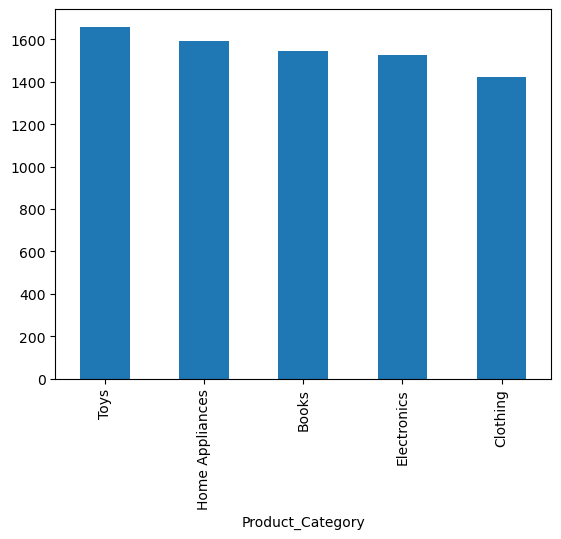

In [71]:
merged_df['Product_Category'].value_counts().plot(kind="bar")

In [72]:
df_num=merged_df.select_dtypes(include="number")
df_num.columns

Index(['Product_ID', 'Price', 'Stock_Level', 'Discount', 'Rating_transaction',
       'Transaction_ID', 'Feedback_Rating', 'Age', 'Purchase Amount',
       'Rating_customer', 'Customer_ID', 'Total_purchase_amt', 'Return_count',
       'Avg_feedback_rating', 'Days_since_last_purchase',
       'Customer_Lifetime_Value', 'Churn_Risk', 'Purchase_Frequency',
       'Avg_spending', 'Repeat_Purchase', 'Return_Count',
       'Return_Rate_percentage', 'Days_btw_purchases'],
      dtype='object')

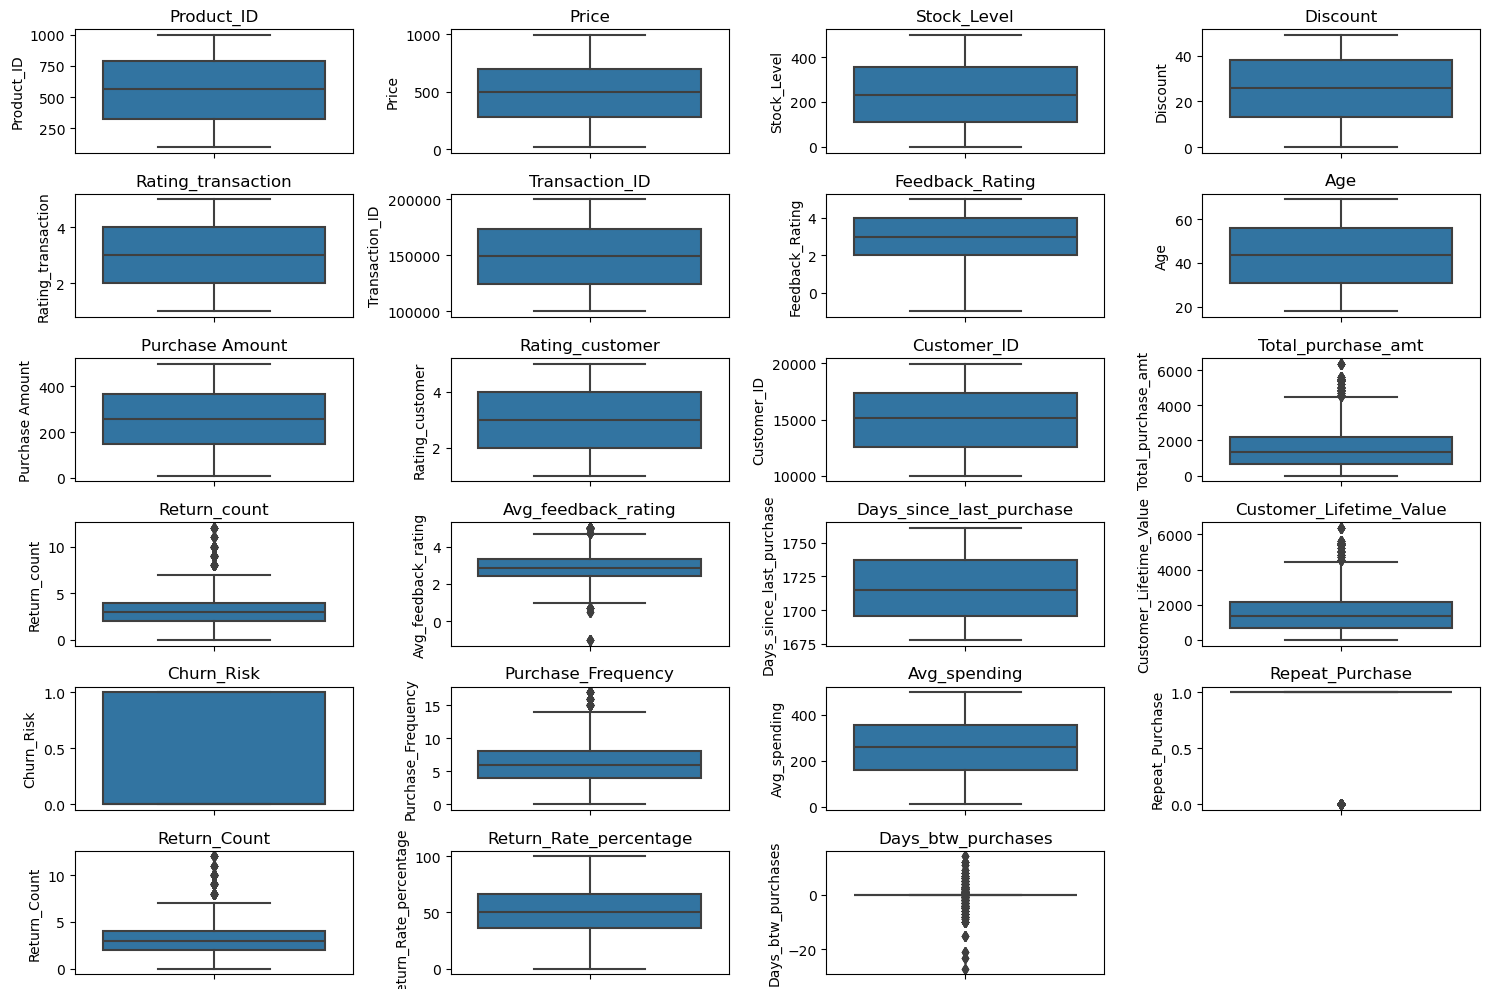

In [73]:
numeric_cols=df_num.columns
plt.figure(figsize=(15, 10))
n_cols = 4  
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)  
    sns.boxplot(y=df_num[col])
    plt.title(col)
plt.tight_layout()
plt.show()

C:\Users\Mir Abdul Malique\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mir Abdul Malique\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mir Abdul Malique\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mir Abdul Malique\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

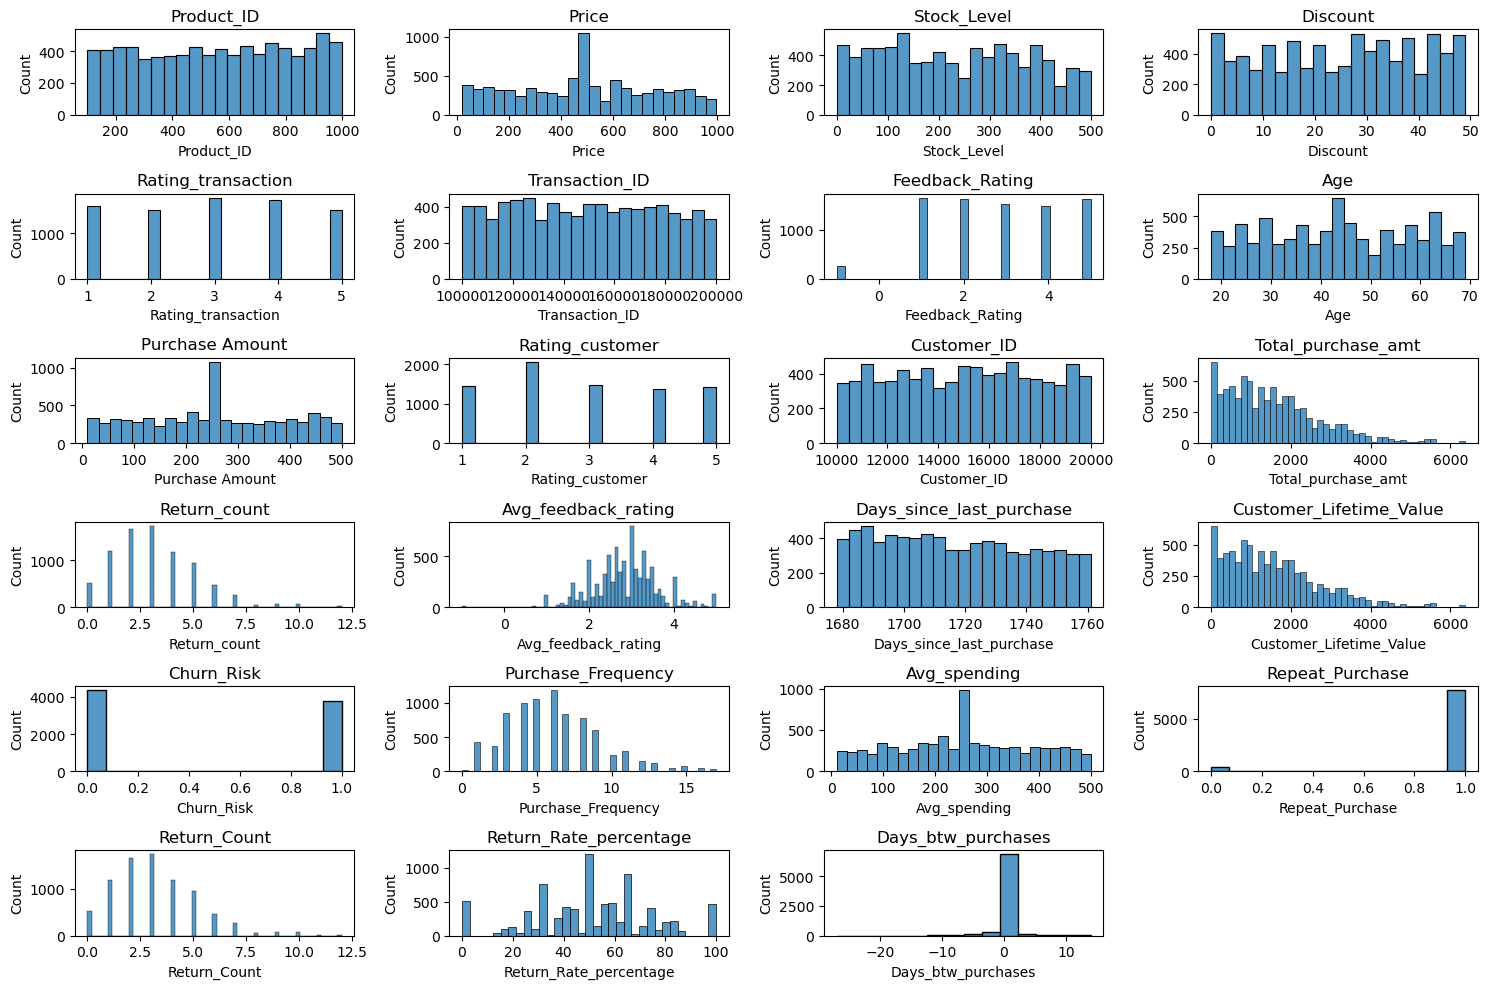

In [74]:
numeric_cols=df_num.columns
plt.figure(figsize=(15, 10))
n_cols = 4  
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)  
    sns.histplot(x=df_num[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [75]:
# To compare each value, since there is a huge scale to convert into a similar scale we use min-max scale normalization
from sklearn.preprocessing import MinMaxScaler
le=MinMaxScaler()
df_norm=le.fit_transform(df_num)

In [76]:
pd.DataFrame(df_norm).describe().T

,count,mean,std,min,25%,50%,75%,max
0,8161.0,0.511441,0.294501,0.0,0.252784,0.515590,0.770601,1.0
1,8161.0,0.484675,0.272440,0.0,0.264978,0.490359,0.697770,1.0
2,8161.0,0.469129,0.284173,0.0,0.226000,0.460000,0.710000,1.0
3,8161.0,0.513658,0.295943,0.0,0.265306,0.530612,0.775510,1.0
4,8161.0,0.500796,0.347610,0.0,0.250000,0.500000,0.750000,1.0
5,8138.0,0.491717,0.286512,0.0,0.239893,0.493711,0.737899,1.0
6,8138.0,0.640637,0.262485,0.0,0.500000,0.666667,0.833333,1.0
7,7749.0,0.501045,0.286155,0.0,0.254902,0.503849,0.745098,1.0
8,7749.0,0.501582,0.275892,0.0,0.280568,0.506117,0.727592,1.0
9,7749.0,0.475190,0.345507,0.0,0.250000,0.500000,0.750000,1.0


<Axes: xlabel='Age', ylabel='Feedback_Rating'>

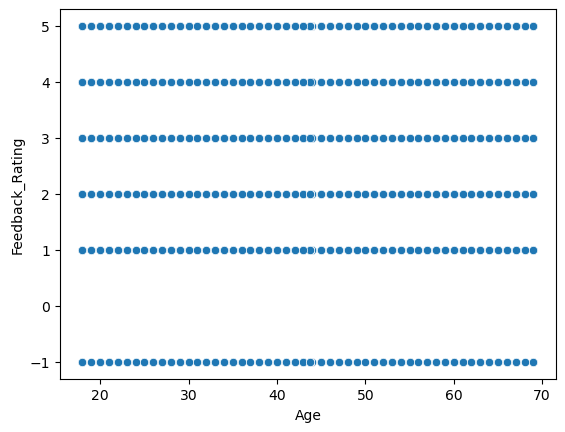

In [77]:
import seaborn as sns
sns.scatterplot(x='Age',y='Feedback_Rating',data=merged_df)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

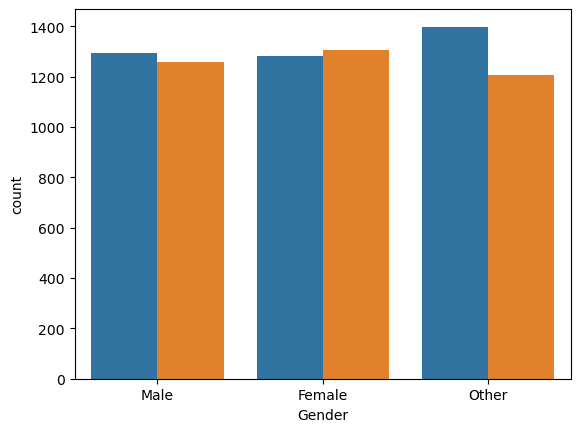

In [78]:
sns.countplot(data=merged_df,x='Gender', hue='Churn_Risk')

In [79]:
merged_df['Gender'].isna().sum()

412

In [80]:
merged_df['Churn_Risk'].isna().sum()

0

In [81]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8161 entries, 0 to 20626
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Product_ID                8161 non-null   int64         
 1   Product Name              8161 non-null   object        
 2   Category                  8161 non-null   object        
 3   Price                     8161 non-null   float64       
 4   Stock_Level               8161 non-null   int64         
 5   Supplier                  8161 non-null   object        
 6   Discount                  8161 non-null   int64         
 7   Rating_transaction        8161 non-null   int64         
 8   Transaction_ID            8138 non-null   float64       
 9   Shipping_Date             8138 non-null   datetime64[ns]
 10  Delivery_Status           8138 non-null   object        
 11  Return_Status             8138 non-null   object        
 12  Feedback_Rating         

In [ ]:
merged_df['Churn_Risk']=merged_df['Churn_Risk'].astype("Object")
merged_df['Gender']=merged_df['Gender'].astype("Object")

In [ ]:
sns.scatterplot(x='Purchase Amount',y='Feedback_Rating',hue='Return_Status', data=merged_df)